<a href="https://colab.research.google.com/github/MrMapleMan/scriptures/blob/main/All_LDS_Scriptures_Word_%26_Pattern_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Bible Processed Text from GitHub

In [ ]:
import base64
import requests
import re
import pandas as pd

# master = 'https://raw.githubusercontent.com/MrMapleMan/bible-wordmap/main/verses-only.txt'
# req = requests.get(master)
# bibleText = req.text

m = 'https://raw.githubusercontent.com/MrMapleMan/scriptures/main/lds-scriptures.csv'
req = requests.get(m)
with open('temp.csv','w+') as f:
  f.write(req.text)
df_verses = pd.read_csv('temp.csv')
verses = req.text.split('\n')
for i in verses[:5]:
  x = i.split('\t')
  print(x)

splitOne = verses[0].split(',')
splitTwo = verses[1].split(',')

for i,j in enumerate(splitOne):
  print("{:02,} {:20} {:}".format(i,j,splitTwo[i]))

for i,j in enumerate(df_verses.columns):
  print(i,j,df_verses.iloc[1,i])

  # Key columns:  volume_title (04), book_title (05),
  #               chapter_number(14), verse_number(15),
  #               scripture_text(16), verse_title(17)

['volume_id,book_id,chapter_id,verse_id,volume_title,book_title,volume_long_title,book_long_title,volume_subtitle,book_subtitle,volume_short_title,book_short_title,volume_lds_url,book_lds_url,chapter_number,verse_number,scripture_text,verse_title,verse_short_title\r']
['1,1,1,1,"Old Testament",Genesis,"The Old Testament","The First Book of Moses called Genesis","","",OT,Gen.,ot,gen,1,1,"In the beginning God created the heaven and the earth.","Genesis 1:1","Gen. 1:1"\r']
['1,1,1,2,"Old Testament",Genesis,"The Old Testament","The First Book of Moses called Genesis","","",OT,Gen.,ot,gen,1,2,"And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.","Genesis 1:2","Gen. 1:2"\r']
['1,1,1,3,"Old Testament",Genesis,"The Old Testament","The First Book of Moses called Genesis","","",OT,Gen.,ot,gen,1,3,"And God said, Let there be light: and there was light.","Genesis 1:3","Gen. 1:3"\r']
['1,1,1,4,"Old Testament"

## Search Verses for Words or Patterns

In [ ]:
import re
import time

# Examples:
#  [r'mother|father|parent'] # Searches for *any* of the words (OR)
#  [r'mother',r'father',r'parent'] # Searches for *all* of the words (AND)

#  [r'\bown\b',r'Christ|Jesus|Lord']
# patterns = [r'testify',r'Christ|Jesus|Lord',r'\bown\b']
# patterns = [r'(?:F|f)ather',r'hath|have|has',r'\ball\b']
patterns = [r'-{5,}']
orderMattersBool = False
compiled = [re.compile(p, re.IGNORECASE) for p in patterns]
matchingVerses = []

def checkVerse(txt, orderMatters=False):
  # return not (None in [c.search(txt) for c in compiled])  # Alternate concise method
  verseMatches = True
  startPos = 0
  for c in compiled:
    x = c.search(txt,pos=startPos)
    if x is None:
      verseMatches = False
      break
    elif orderMatters:
      startPos = x.end()
  return verseMatches

matchingVerses = df_verses[[checkVerse(i,orderMatters=orderMattersBool) for i in df_verses['scripture_text']]]

minData = matchingVerses[['volume_title','verse_title','scripture_text']]
minData.reset_index(inplace=True)
minData.to_csv('pattern-search-results.csv', index=True)

if len(matchingVerses) == 0:
  print('No matching verses found.')

print("Matching verses ({:,} total - {:.1f}% - 1 in {:,}):".format(
    len(matchingVerses), len(matchingVerses)/len(df_verses)*100,
    round(len(df_verses)/len(matchingVerses))))
minData

No matching verses found.


ZeroDivisionError: ignored

In [ ]:
import re
s = '1234abcd test words jaosiefjpsoif90ewuf9f8'
# for i in re.finditer('\d',s):
  # print(i.start(), i.span(), i.group(),i.end(), s[i.start():])

b = re.search('j25',s)
if b is not None:
  print(b.group(), b.span())
else:
  print('Not found')
if b:
  print('yep')
else:
  print(type(b))

Not found
<class 'NoneType'>


## Sandbox

In [ ]:
df_verses['chapter_id'][:50]
ntLength = len(df_verses[df_verses['volume_title']=='New Testament'])
otLength = len(df_verses[df_verses['volume_title']=='Old Testament'])
print(ntLength, otLength, ntLength + otLength)

7957 23145 31102


In [ ]:
import numpy as np

x = (np.random.rand(9,20)*100-50)
# x = [[round(j,1) for j in i] for i in x]
# pd.DataFrame(x,columns=['a','b'])
pd.DataFrame(x, columns=[chr(ord('a')+i-1)*3 for i in range(1,x.shape[1]+1)])

,aaa,bbb,ccc,ddd,eee,fff,ggg,hhh,iii,jjj,kkk,lll,mmm,nnn,ooo,ppp,qqq,rrr,sss,ttt
0,11.661435,31.289485,-32.339719,28.499953,-27.123870,-15.593648,45.602302,25.934125,20.085572,-31.776219,46.248550,42.591937,-22.172863,3.841457,-2.962897,6.519615,-39.647400,-32.965169,27.361079,44.329919
1,-1.354618,-46.240353,16.047469,-3.856592,48.640180,22.795691,49.045894,-46.663270,23.040717,22.249988,-35.810039,-20.154252,-8.931735,-42.087409,-1.046802,44.827706,-38.964485,15.465533,-22.923295,43.417125
2,-0.841631,-35.749903,-36.190676,-26.823374,30.403378,0.090322,-29.181451,42.874540,12.923747,-39.006556,-29.025443,25.864470,-16.099084,0.741490,-11.730076,47.343697,-13.699914,-40.882544,8.860196,-15.418777
3,-28.765223,-32.984605,-19.067291,-27.155973,7.589813,35.827039,-21.659371,30.196686,17.003877,-31.604056,26.724701,-5.919001,-8.524980,11.131094,8.385512,28.871142,33.978988,46.459873,-42.604422,4.424545
4,7.990923,-47.941178,-18.811569,38.389330,5.961643,-25.311183,-30.731502,16.858654,35.268107,38.022852,0.699048,-34.335110,-39.073176,-20.172977,-16.377000,-39.920889,-13.961050,6.762177,45.188567,-11.694058
5,1.821616,38.444758,-26.281201,-22.233610,38.886594,13.736040,-43.336120,25.801410,-48.624099,33.931284,-26.629115,-43.582990,40.067929,43.001402,-27.217934,-0.303972,18.526546,25.865425,-6.905510,13.441521
6,-6.056560,10.850371,-41.176169,25.925459,33.852117,-49.698148,20.095067,-29.754112,29.674178,28.745885,42.034613,11.188325,49.908632,-35.879532,46.791360,10.443454,21.366853,9.195967,37.566250,-16.202387
7,19.057303,-46.542545,37.124990,49.552490,-36.669709,-43.651041,7.400086,49.490045,-21.197298,43.188855,19.610974,14.327133,-26.125784,-42.620941,3.212659,-22.118316,47.985654,-15.218965,9.875530,27.962834
8,-6.265770,-39.764725,-19.407414,-41.220256,3.298996,-17.307272,-14.730998,-6.797951,17.038858,43.105172,-16.991109,18.629440,-34.701424,14.225967,-25.162428,-28.220063,-34.762328,39.760434,22.003005,-3.960772


In [ ]:
[[1,2]]*9

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [ ]:
x = df_verses[-1:].scripture_text.tolist()[0][::2]
a = (' '.join([i for i in df_verses[-1:].scripture_text.tolist()[0][::2]]))
b = (' '.join([i for i in x]))

In [ ]:
# Get verses before and after
i = matchingVerses.index.tolist()
iMinus = [x-1 for x in i]
iPlus  = [x+1 for x in i]
ansMinus = df_verses.loc[iMinus][['verse_title','scripture_text']]
ansPlus  = df_verses.loc[iPlus][['verse_title','scripture_text']]
ans = pd.DataFrame()
for i in range(len(ansMinus)):
  ans = pd.concat([ans,ansMinus.iloc[i].to_frame().T])
  ans = pd.concat([ans,matchingVerses.iloc[i].to_frame().T])
  ans = pd.concat([ans,ansPlus.iloc[i].to_frame().T])

ans


# z = list(zip(ans.index.tolist(),ans.verse_title.tolist(),ans.scripture_text.tolist()))
# maxLength = max([len(i[1]) for i in z])
# formatString = '{:6,}  {:%d}  {:}' %maxLength
# for i in z:
#   print(formatString.format(i[0],i[1],i[2]))

AttributeError: ignored

In [ ]:
# EVERY OTHER LETTER
import re

txt = ' '.join(df_verses['scripture_text'])
toPrint = txt[:300][::2]
# toPrint = re.sub('[^a-z]','',txt[:500],flags=re.IGNORECASE)[::2][:150]
toPrint = ' '.join([i for i in toPrint])
print(toPrint)
# print(re.sub('[^a-z]','',txt[:500],flags=re.IGNORECASE)[:300])
print(txt[:300])
# re.sub()

len(df_verses)#.iloc[-1].name

I   h   e i n n   o   r a e   h   e v n a d t e e r h   n   h   a t   a   i h u   o m   n   o d   n   a k e s w s u o   h   a e o   h   e p   n   h   p r t o   o   o e   p n t e f c   f t e w t r . A d G d s i , L t t e e b   i h : a d t e e w s l g t   n   o   a   h   i h , t a   t w s g o : a d G
In the beginning God created the heaven and the earth. And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. And God said, Let there be light: and there was light. And God saw the light, that it was good: and Go


41995

## Create Wordmap

In [ ]:
# https://github.com/MrMapleMan/book-of-mormon/blob/7356dcdad9ff307e2f783925e10b579470cd98b7/bom-wordmap.py
# Latest revision: https://github.com/MrMapleMan/book-of-mormon/blob/main/bom-wordmap.py

import os
import subprocess
import re
from operator import itemgetter
from collections import Counter, defaultdict
import time
import random

fa = re.findall

def listStats(txt, volume):

  print("Characters read: {:,}".format(len(txt)))
  print("Characters read (a-z): {:,}".format(len(re.findall('[A-Za-z]',txt))))
  allWords = fa(r'\b[a-zA-Z-_]+\b',re.sub('-{2,}',' ',txt))
  wordCount = len(allWords)
  print("Words read: {:,}".format(wordCount))
  uniqueWords = list(set(allWords))
  uniqueWordCount = len(uniqueWords)
  print('Unique words: {:,}'.format(uniqueWordCount))
  print('Average uses of a word: {:,}'.format(int(wordCount/uniqueWordCount)))
  print()

  # t1_counter = time.time()
  # x = Counter(allWords)
  # t2_counter = time.time()
  # xSorted = sorted(x.items(),key=lambda x:x[1],reverse=True)

  wordTracker = defaultdict(int)
  t1_tracker = time.time()
  for i in allWords:
    wordTracker[i] += 1
  t2_tracker = time.time()
  sortedWordTracker = sorted(wordTracker.items(),key=lambda x: (x[1],x[0]),reverse=True)
  idx = 0

  # wordOfInterest = 'israel'
  # print("{:>7} {:>7,} {:>4.1f}% (1 in {:<9}".format(
  #   wordOfInterest, wordTracker[wordOfInterest],
  #   wordTracker[wordOfInterest]/wordCount*100,
  #   '{:,})'.format(round(wordCount/wordTracker[wordOfInterest]))))

  singleUse = [i for i in sortedWordTracker if i[1]==1]
  print('Single use words: {:,}'.format(len(singleUse)))
  print()

  ran = random.randint(0,len(sortedWordTracker)-1)
  ran = sortedWordTracker[ran]
  print('Random word: {:} ({:,} uses)'.format(ran[0],ran[1]))
  print()

  for i in sortedWordTracker[:30]:
    print("{:>7} {:>7,} {:>4.1f}% (1 in {:<9} {:>6.2f} percentile".format(
        i[0], i[1], i[1]/wordCount*100, '{:,})'.format(round(wordCount/i[1])),
        (uniqueWordCount-idx)/uniqueWordCount*100))
    idx += 1

  for i in sortedWordTracker[-1:]:
    idx = len(sortedWordTracker)-1
    print("\n\nLeast common word:")
    print("{:>7} {:>7,} {:>4.1f}% (1 in {:<9} {:>6.2f} percentile".format(
        i[0], i[1], i[1]/wordCount*100, '{:,})'.format(round(wordCount/i[1])),
        (uniqueWordCount-idx)/uniqueWordCount*100))
    # {:>7} {:>7,} {:>4.1f}% {:>6.2f} percentile".format(i[0],i[1],i[1]/wordCount*100,(uniqueWordCount-idx)/uniqueWordCount*100))


  with open('results-'+re.sub(' ','-',volume)+'.csv','w+') as f:
    for i in sortedWordTracker:
      f.write(i[0]+','+str(i[1])+'\n')

print('All Scriptures: ')
txt = '\n'.join(df_verses['scripture_text']).lower()
listStats(txt, 'All Scriptures')

titles = list(set(df_verses.volume_title.tolist()))

for volumeTitle in titles:

  verses_only = '\n'.join(df_verses[df_verses['volume_title']==volumeTitle]\
                          ['scripture_text']).lower()

  print('\n\nBook of scripture: '+volumeTitle)
  listStats(verses_only, volumeTitle)

    # OLD METHOD
    #uniqueWordsCounts = []
    # for word in uniqueWords:
    #   x= len([j for j in allWords if j==word])
    #   uniqueWordsCounts.append(x)
    # zippedUniqueWords = zip(uniqueWords,uniqueWordsCounts)
    # print(sorted(zippedUniqueWords[:100],key=itemgetter(1),reverse=True))


All Scriptures: 
Characters read: 6,290,288
Characters read (a-z): 4,912,129
Words read: 1,197,228
Unique words: 15,086
Average uses of a word: 79

Single use words: 4,620

Random word: legally (2 uses)

    the  92,956  7.8% (1 in 13)       100.00 percentile
    and  76,161  6.4% (1 in 16)        99.99 percentile
     of  51,719  4.3% (1 in 23)        99.99 percentile
     to  22,983  1.9% (1 in 52)        99.98 percentile
   that  22,230  1.9% (1 in 54)        99.97 percentile
     in  18,903  1.6% (1 in 63)        99.97 percentile
   unto  14,746  1.2% (1 in 81)        99.96 percentile
     he  14,704  1.2% (1 in 81)        99.95 percentile
      i  14,599  1.2% (1 in 82)        99.95 percentile
  shall  14,593  1.2% (1 in 82)        99.94 percentile
    for  13,109  1.1% (1 in 91)        99.93 percentile
   they  13,021  1.1% (1 in 92)        99.93 percentile
     be  11,630  1.0% (1 in 103)       99.92 percentile
    his  11,618  1.0% (1 in 103)       99.91 percentile
      a  11,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60121a4c0>]],
      dtype=object)

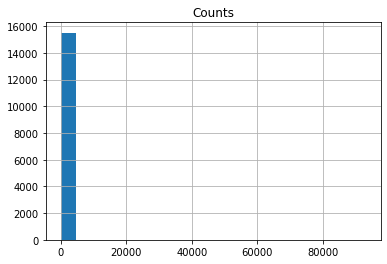

In [ ]:
words = pd.Series([i[0] for i in sortedWordTracker])
counts = pd.Series([i[1] for i in sortedWordTracker])
df = pd.DataFrame({'Words':words,'Counts':counts})
df.describe()
# pd.DataFrame({ 'City name': city_names, 'Population': population })
df.hist('Counts',bins=20)
# print(n,bins,batches)
# len(df[df.Counts < 3])

## Count Words in Each Verse

In [ ]:
from re import findall as fa
# allWords = fa('\\b[a-zA-Z-_]+\\b',verses_only)
df_verses['Word Counts'] = [len(fa(r'\b[a-zA-Z-_]+\b',i)) for i in df_verses['scripture_text']]
lengths_sorted = df_verses[['verse_title','Word Counts']].sort_values(by=['Word Counts'], ascending=False)
lengths_sorted.reset_index()
lengths_sorted[:20]
# s = df_verses[df_verses.verse_title=='Doctrine and Covenants 132:19']['scripture_text'].values[0]
# x = fa('\\b[a-zA-Z-_]+\\b',s)
# print(len(x),x)

,verse_title,Word Counts
41107,Doctrine and Covenants 132:19,213
41934,Joseph Smith--History 1:28,209
41041,Doctrine and Covenants 128:18,208
41243,Doctrine and Covenants 135:3,193
41012,Doctrine and Covenants 127:1,177
41247,Doctrine and Covenants 135:7,165
41970,Joseph Smith--History 1:64,165
41966,Joseph Smith--History 1:60,160
41931,Joseph Smith--History 1:25,157
41926,Joseph Smith--History 1:20,155


In [ ]:
def avg(x):
  return sum(x)/len(x)

dfg = df_verses.groupby('volume_title')
titles = list(set(df_verses.volume_title.tolist()))
maxLength = max([len(i) for i in titles])
for volumeTitle in titles:
  wds = dfg.get_group(volumeTitle)['Word Counts']
  s = 'Average words per verse in {:'+str(maxLength+1)+'} {:,.3f}   min: {:3,}   max: {:3,}'
  print(s.format(volumeTitle+':', avg(wds), min(wds), max(wds)))
  # Get shortest verse
  shortestVerse = df_verses[df_verses['volume_title']==volumeTitle].sort_values(
      by=['Word Counts'], ascending=True).iloc[0]
  v = shortestVerse[['verse_title','scripture_text','Word Counts']]

  for c in v.index:
    print('{:15} {:}'.format(c,v[c]))

  # Get longest verse
  longestVerse = df_verses[df_verses['volume_title']==volumeTitle].sort_values(
      by=['Word Counts'], ascending=False).iloc[0]
  v = longestVerse[['verse_title','scripture_text','Word Counts']]

  for c in v.index:
    print('{:15} {:}'.format(c,v[c]))
  print()

Average words per verse in New Testament:          22.704   min:   2   max:  68
verse_title     John 11:35
scripture_text  Jesus wept.
Word Counts     2
verse_title     Revelation 20:4
scripture_text  And I saw thrones, and they sat upon them, and judgment was given unto them: and I saw the souls of them that were beheaded for the witness of Jesus, and for the word of God, and which had not worshipped the beast, neither his image, neither had received his mark upon their foreheads, or in their hands; and they lived and reigned with Christ a thousand years.
Word Counts     68

Average words per verse in Old Testament:          26.387   min:   3   max:  91
verse_title     Nehemiah 10:7
scripture_text  Meshullam, Abijah, Mijamin,
Word Counts     3
verse_title     Esther 8:9
scripture_text  Then were the king's scribes called at that time in the third month, that is, the month Sivan, on the three and twentieth day thereof; and it was written according to all that Mordecai commanded unto th

## Create Character Map

In [ ]:
import time
from collections import Counter


versesNoLines = ''.join(df_verses['scripture_text']).lower()

versesNoLines = re.sub('\n|\r| ','',versesNoLines)
charCount = len(versesNoLines)
uniqueCharCount = len(list(set(versesNoLines)))

t1_counter = time.time()
x = Counter(versesNoLines)
t2_counter = time.time()
xItems = x.items()
xSorted = sorted(xItems,key=lambda x:x[1],reverse=True)

print('Characters read: {:,}'.format(charCount))
print()

idx=0
for i in xSorted[:]:
  # print("{:>7} {:>7,} {:>4.1f}% {:>6.2f} percentile".format(i[0],i[1],i[1]/charCount*100,(uniqueCharCount-idx)/uniqueCharCount*100))
  print("{:>7} {:>7,} {:>4.1f}% (1 in {:<10} {:>6.2f} percentile".format(
        i[0], i[1], i[1]/charCount*100, '{:,})'.format(round(charCount/i[1])),
        (uniqueCharCount-idx)/uniqueCharCount*100))
  idx += 1
print()

Characters read: 5,095,456

      e 627,439 12.3% (1 in 8)         100.00 percentile
      t 480,006  9.4% (1 in 11)         97.96 percentile
      h 418,957  8.2% (1 in 12)         95.92 percentile
      a 411,122  8.1% (1 in 12)         93.88 percentile
      o 371,837  7.3% (1 in 14)         91.84 percentile
      n 343,926  6.7% (1 in 15)         89.80 percentile
      i 294,938  5.8% (1 in 17)         87.76 percentile
      s 283,154  5.6% (1 in 18)         85.71 percentile
      r 259,123  5.1% (1 in 20)         83.67 percentile
      d 239,966  4.7% (1 in 21)         81.63 percentile
      l 195,488  3.8% (1 in 26)         79.59 percentile
      u 125,622  2.5% (1 in 41)         77.55 percentile
      f 124,358  2.4% (1 in 41)         75.51 percentile
      m 124,254  2.4% (1 in 41)         73.47 percentile
      , 104,263  2.0% (1 in 49)         71.43 percentile
      w 100,753  2.0% (1 in 51)         69.39 percentile
      y  95,035  1.9% (1 in 54)         67.35 percentile
   

## First Words

In [ ]:
from collections import Counter
from re import findall as fa

versesList = df_verses['scripture_text'].tolist()

firstWords = [re.search(r' *(\b[^ ]+?\b)',v) for v in versesList]
lenBefore = len(firstWords)
noneVerses = [i for i in firstWords if i == None]
firstWords = [i for i in firstWords if i != None]
lenAfter = len(firstWords)

if lenAfter != len(df_verses):
  print('Not all first words captured.')

print()

firstWords = [fa('[a-z0-9]+',word.group(),re.IGNORECASE)[0]
              for word in firstWords]

uniqueFirstWords = list(set(firstWords))
uniqueFirstWordsCount = len(uniqueFirstWords)



x = Counter(firstWords)
sortedList = sorted(x.items(),key=lambda x:(x[1],x[0]),reverse=True)
totalFirsts = len(firstWords)
uniqueFirstWordsCount = len(x)
print('Unique first words: {:,}'.format(uniqueFirstWordsCount))
print()

formatStr = '{:>15} {:>6} {:>5}'
formatStrNumbers = '{:>15} {:>6,} {:>5}'

print(formatStr.format('First Word','Count','Percent'))
print(formatStr.format('-'*len('First Word'),'-'*len('Count'),
                       '-'*len('Percent')))
for i in sortedList:
  print(formatStrNumbers.format(i[0],i[1],
                                '{:.1f}%'.format(i[1]/totalFirsts*100)))


Unique first words: 1,082

     First Word  Count Percent
     ----------  ----- -------
            And 17,255 41.1%
            For  2,263  5.4%
            But  1,992  4.7%
            The  1,544  3.7%
           Then  1,313  3.1%
            Now  1,067  2.5%
              I    795  1.9%
      Therefore    745  1.8%
         Behold    700  1.7%
             He    658  1.6%
      Wherefore    512  1.2%
             So    496  1.2%
           Thou    407  1.0%
            Yea    381  0.9%
           They    368  0.9%
           That    358  0.9%
             If    341  0.8%
            Let    329  0.8%
             In    323  0.8%
           When    305  0.7%
           Thus    280  0.7%
              O    260  0.6%
             As    209  0.5%
            Who    205  0.5%
          These    195  0.5%
              A    194  0.5%
             Ye    179  0.4%
           This    171  0.4%
   Nevertheless    166  0.4%
            All    166  0.4%
             My    164  0.4%
           

## Verse Length Statistics

In [ ]:
import statistics
from math import prod

print(df_verses.columns)

'''
# Group by Book , chapter (all 1 book in D&C)
# For each group, get last verse (aka verse index == max(verse index) or last(verse_index))
results = df_verses[df_verses['volume_title']=='Doctrine and Covenants']\
  .sort_values(['chapter_number','verse_number'])\
  .groupby('chapter_number')\
  .tail(2)\
  .groupby('chapter_number')\
  .head(1)
[i for i in results['scripture_text'] if i.find('solemnities')!=-1]
'''

def prod(x):
  return 'fmt\'d: {:,}'.format(len(x))


df_verses.groupby(['volume_title']).verse_number.agg(low="min",
                                                     high="max",
                                                     sum="sum",
                                                     count="count",
                                                     avg="mean",
                                                     std_dev="std",
                                                     number=prod)

# x = df_verses[df_verses['volume_title']=='Book of Mormon'].groupby(['book_title','chapter_number']).verse_number.agg(verse_count='count')
# verse_counts = [i for i in x['verse_count']]
# print(statistics.stdev(verse_counts))

Index(['volume_id', 'book_id', 'chapter_id', 'verse_id', 'volume_title',
       'book_title', 'volume_long_title', 'book_long_title', 'volume_subtitle',
       'book_subtitle', 'volume_short_title', 'book_short_title',
       'volume_lds_url', 'book_lds_url', 'chapter_number', 'verse_number',
       'scripture_text', 'verse_title', 'verse_short_title'],
      dtype='object')


,low,high,sum,count,avg,std_dev,number
volume_title,,,,,,,
Book of Mormon,1,77,111447,6604,16.875681,11.655571,"fmt'd: 6,604"
Doctrine and Covenants,1,145,106941,3654,29.266831,28.748877,"fmt'd: 3,654"
New Testament,1,80,150206,7957,18.877215,13.747147,"fmt'd: 7,957"
Old Testament,1,176,379877,23145,16.412919,14.131797,"fmt'd: 23,145"
Pearl of Great Price,1,75,15683,635,24.697638,17.891980,fmt'd: 635


In [ ]:
len(df_verses[df_verses.volume_title=='Old Testament'])

23145